Import Libraries

In [2]:
#Numpy is used for linear algebra
import numpy as np
#Pandas is used for data processing, reading the CSV File
import pandas as pd

#Matplotlib and Seaborn is used for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove any warnings
import warnings
warnings.filterwarnings('ignore')

from numpy import nan

from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Import the CSV file into our project

In [3]:
#Loading dataset
df = pd.read_csv('data//weatherAUS.csv')

## 1. Exploratory Data Analysis

In [5]:
df.shape

(142193, 24)

In [6]:
#We can see the column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
#We can preview the first 5 rows of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [8]:
#Get the mean values of everything by the RainTomorrow variable
df.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
RainTomorrow,,,,,,,,,,,,,,,,,
No,11.897675,23.836247,1.270290,5.734807,8.546358,38.288391,13.567314,18.222804,66.217573,46.510625,1018.595599,1016.113587,3.932282,3.921896,17.077001,22.402905,0.075254
Yes,13.186890,21.119100,6.142104,4.527779,4.471761,45.946764,15.508577,20.078509,77.983314,68.800019,1014.400000,1012.300820,6.099990,6.360065,16.676598,19.197113,10.269809


Let's visualize the 'RainTomorrow'

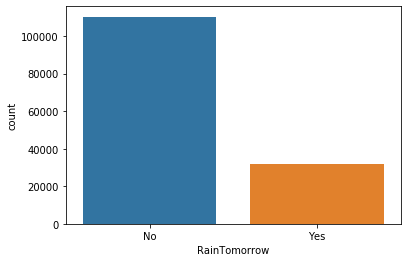

Percentage of raining tomorrow 22.42% with a value of  31877
Percentage of not raining tomorrow: 77.58% with a value of  110316


In [9]:
sns.countplot(x="RainTomorrow", data= df)
plt.show()

countYesRainTmr = len(df[df.RainTomorrow == "Yes"])
countNoRainTmr = len(df[df.RainTomorrow == "No"])

print("Percentage of raining tomorrow {:.2f}% with a value of ".format((countYesRainTmr / (len(df.RainTomorrow))*100)), (countYesRainTmr))
print("Percentage of not raining tomorrow: {:.2f}% with a value of ".format((countNoRainTmr / (len(df.RainTomorrow))*100)), (countNoRainTmr))

Let's visualize the 'RainToday'

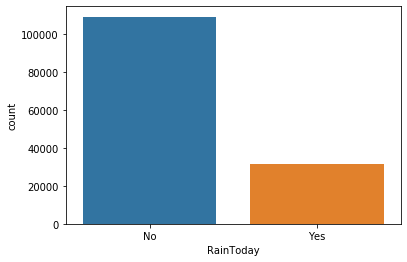

Percentage of raining today 22.12% with a value of  31455
Percentage of not raining today: 76.89% with a value of  109332


In [10]:
sns.countplot(x="RainToday", data= df)
plt.show()

countYesRainTdy = len(df[df.RainToday == "Yes"])
countNoRainTdy = len(df[df.RainToday == "No"])

print("Percentage of raining today {:.2f}% with a value of ".format((countYesRainTdy / (len(df.RainToday))*100)), (countYesRainTdy))
print("Percentage of not raining today: {:.2f}% with a value of ".format((countNoRainTdy / (len(df.RainToday))*100)), (countNoRainTdy))

Visualize all the locations if it will rain tomorrow or not

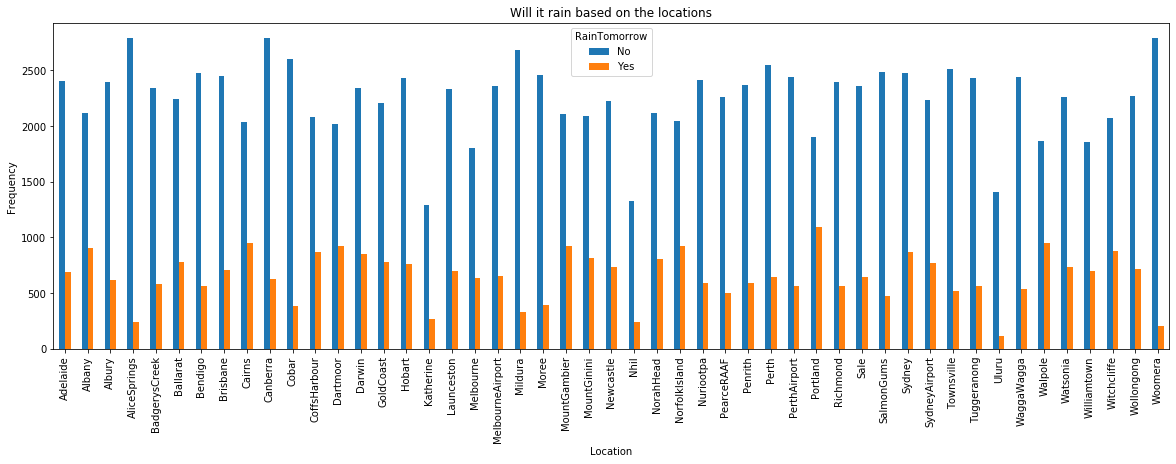

In [11]:
pd.crosstab(df.Location,df.RainTomorrow).plot(kind="bar",figsize=(20,6))
plt.title('Will it rain based on the locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

Compare it will it will rain today vs if it will rain tomorrow

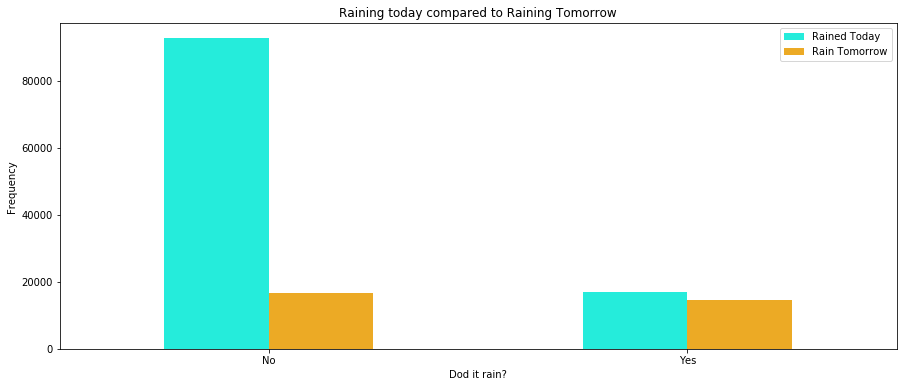

In [12]:
pd.crosstab(df.RainToday,df.RainTomorrow).plot(kind="bar",figsize=(15,6),color=['#25ECDB','#ECAA25' ])
plt.title('Raining today compared to Raining Tomorrow')
plt.xlabel('Dod it rain?')
plt.xticks(rotation=0)
plt.legend(["Rained Today", "Rain Tomorrow"])
plt.ylabel('Frequency')
plt.show()

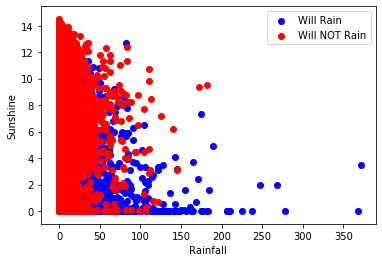

In [13]:
plt.scatter(x=df.Rainfall[df.RainTomorrow == "Yes"], y=df.Sunshine[(df.RainTomorrow == "Yes")], c="blue")
plt.scatter(x=df.Rainfall[df.RainTomorrow == "No"], y=df.Sunshine[(df.RainTomorrow == "No")], c="red")
plt.legend(["Will Rain", "Will NOT Rain"])
plt.xlabel("Rainfall")
plt.ylabel("Sunshine")
plt.show()

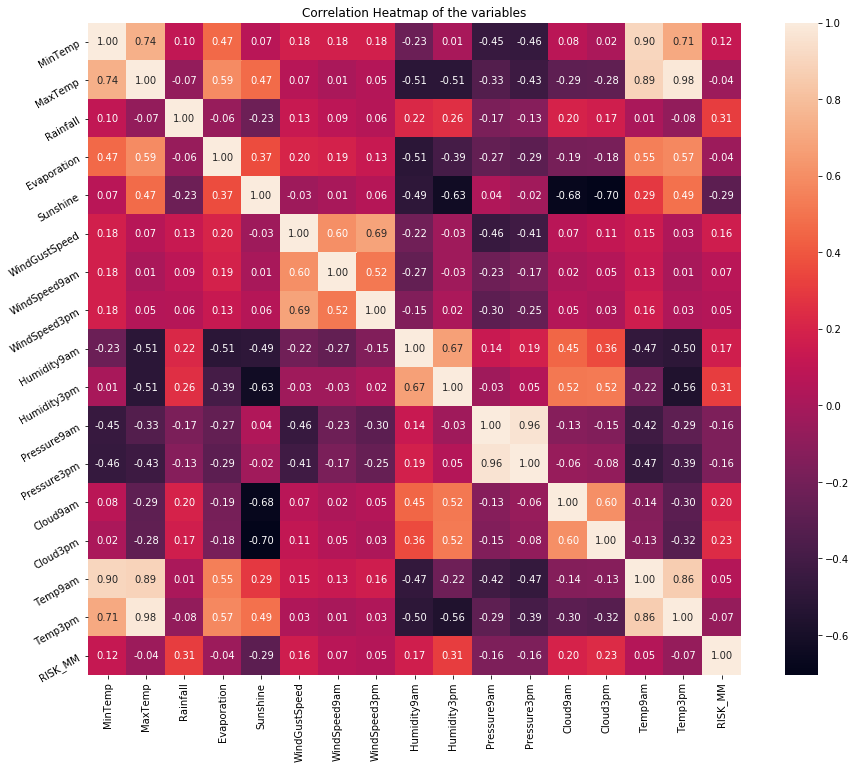

In [14]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of the variables')
corr_plot = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
corr_plot.set_xticklabels(corr_plot.get_xticklabels(), rotation=90)
corr_plot.set_yticklabels(corr_plot.get_yticklabels(), rotation=30)           
plt.show()

# Data Preparation

## Data Cleaning

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
#Check if there are any missing values
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
# Remove the field from the data set that we don't
# want to include in our model
del df['RISK_MM']
del df['Date']
del df['Cloud3pm']
del df['Cloud9am']
del df['Location']

__RISK_MM is removed__
- According to the author of the dataset. This is what he wrote himself.

- "Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. Read more about it here (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/discussion/78316)."

- That's why the column "RISK_MM" is removed.

__Date__ is removed because I feel it's not needed when we need to predict rain based on the weather/environment.

__Cloud3PM/Cloud9am__ is removed because 50% of the data are missing.

__Location__ is removed because the I want to find if it will rain in Australia(generalized) and not in specific a location.


In [7]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 14 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


## Outliers in the numerical data

In [8]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


- Rainfall has a maximum value of 371 while the standard deviation is only 8.46
- Evaporation has a maximum value of 145 while the standard deviation is only 3.17
- WindSpeed9am has a maximum value of 130 while the standard deviation is only 8.89
- WindSpeed3am has a maximum value of 87 while the standard deviation is only 8.80

All these features are under suspicion to have outliers

### Creating a boxplot will help to visualize the outliers better

Text(0, 0.5, 'WindSpeed3pm')

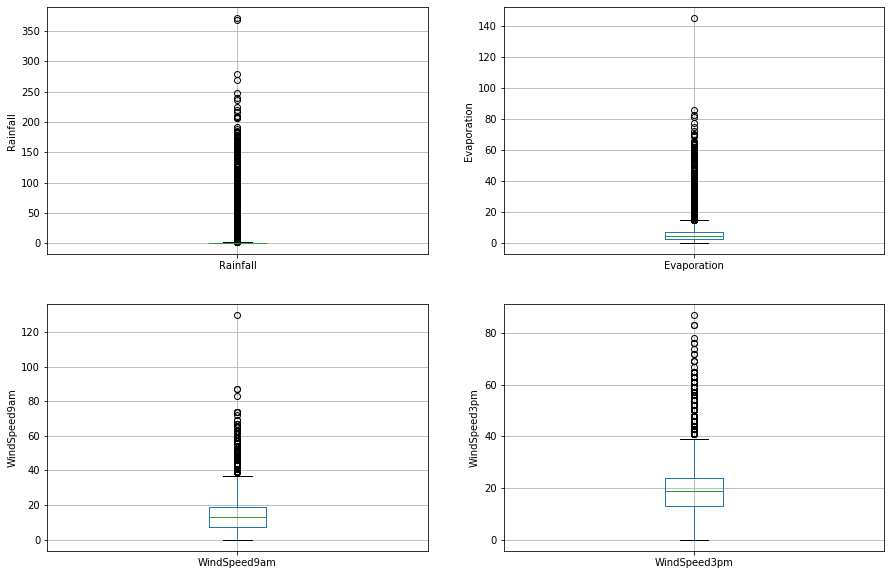

In [9]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Using the interquantile range (IQR) of each features to find the outliers

In [10]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


For Rainfall, the minimum and maximum values are 0.0 and 371.0. 

We can confirm that there are outliers for any values above 3.2.

In [11]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


For Evaporation, the minimum and maximum values are 0.0 and 145. 

We can confirm that there are outliers for any values above 21.8.

In [12]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


For WindSpeed9am, the minimum and maximum values are 0.0 and 130. 

We can confirm that there are outliers for any values above 55.0.

In [13]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


For WindSpeed9am, the minimum and maximum values are 0.0 and 87.0. 

We can confirm that there are outliers for any values above 57.0.

## Missing in the numerical data

In [14]:
#Check if there are any null values
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
dtype: int64

I will impute the missing using median because amputation using median is less affected by outliers and skewed data than the mean, and is usually the preferred measure of central tendency when the distribution is not symmetrical.

In [15]:
# Impute the missing values with mean
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['MinTemp'].fillna(df['MinTemp'].median(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

In [16]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

## Missing in the categorical data

In [17]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
# Impute the missing values with mode

df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
#We don't have to impute RainTomorrow because there is no missing data inside

In [19]:
df[categorical].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [20]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


## Removal of outliers

In [21]:
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

df['Rainfall'] = max_value(df, 'Rainfall', 3.2)
df['Evaporation'] = max_value(df, 'Evaporation', 21.8)
df['WindSpeed9am'] = max_value(df, 'WindSpeed9am', 55)
df['WindSpeed3pm'] = max_value(df, 'WindSpeed3pm', 57)

In [22]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,0.675580,5.145828,8.042236,39.920123,13.988030,18.640341,68.858235,51.495742,1017.648460,1015.252481,16.985681,21.675977
std,6.388936,7.109617,1.184153,2.813565,2.769638,13.140632,8.825786,8.701679,18.932512,20.532227,6.746267,6.681810,6.472206,6.871243
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


## Converting RainToday & RainTomorrow into 1(Yes) or 0(No)

In [23]:
# First of all, we should deal with the Rain Today and Rain Tomorrow variables
# Changing the Yes/No to 1/0 for RainToday and RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [24]:
df.shape

(142193, 19)

### On-hot encode the categorical data

In [25]:
#Replace categorcial data with on-hot encoded data
features_df = pd.get_dummies(df, columns=['WindGustDir', 
                                          'WindDir9am', 
                                          'WindDir3pm', ])

features_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
# Export the clean dataset into a .csv file
features_df.to_csv(r'data//weatherAUS_clean.csv', index = False)

## Splitting data into train and test

In [27]:
# Remove the labled data
del features_df['RainTomorrow']
# Training and testing only accept matrix not data frame
X = features_df.to_numpy()
y = df['RainTomorrow'].to_numpy()

from sklearn import model_selection

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)

## Model Comparison with
- Logistic Regression
- Linear Discriminat Analysis
- K-Neighbors Classifier
- Decision Tree Classifier
- Gaussian NB
- Support Vector Machines

- Random Forest Classifier

- Gradient Boosting Classifier

LogisticRegression: Mean Accuracy: 0.837186 / Standard Deviation Accuracy: (0.017813)
LinearDiscriminantAnalysis: Mean Accuracy: 0.839022 / Standard Deviation Accuracy: (0.017812)
KNeighborsClassifier: Mean Accuracy: 0.822987 / Standard Deviation Accuracy: (0.019183)
DecisionTreeClassifier: Mean Accuracy: 0.767640 / Standard Deviation Accuracy: (0.021968)
GaussianNB: Mean Accuracy: 0.698930 / Standard Deviation Accuracy: (0.060161)
SVM: Mean Accuracy: 0.834704 / Standard Deviation Accuracy: (0.018179)


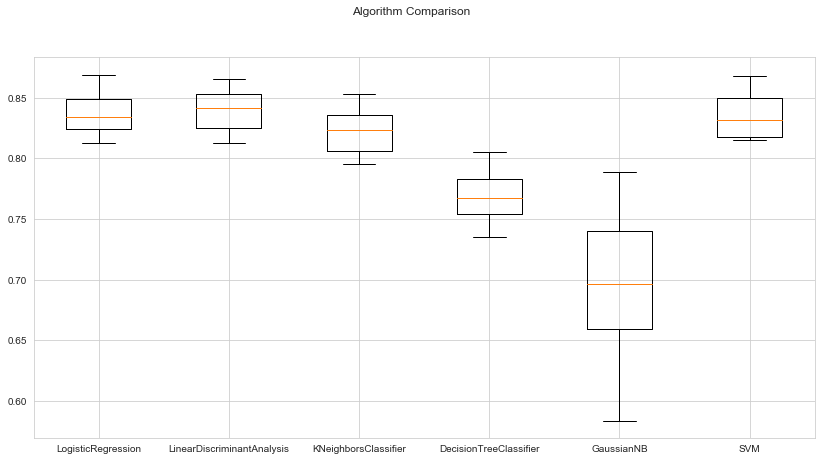

In [62]:
## Comparing regression models
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics


#Remove warnings
warnings.filterwarnings('ignore')
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: Mean Accuracy: %f / Standard Deviation Accuracy: (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
fig.set_figheight(7)
fig.set_figwidth(14)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The 10-fold (n_splits) cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

A box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.


From these results, it would suggest that both logistic regression and linear discriminate analysis are perhaps worthy of further study on this problem.

### I will be using Linear Discriminant Analysis (LDA) to compare with the other follow-up models since it gives us the best mean accuracy among all the models.

In [32]:
accuracies = {}
#Confusion Matrix
lda = LinearDiscriminantAnalysis()
#fit starts the training sets
lda.fit(X_train, y_train)

#Put all the accuracy into an array
acc = lda.score(X_test, y_test)*100
accuracies['Linear Discriminate Analysis'] = acc

rain_prediction_lda = lda.predict(X_test)

print("Accuracy:")
print(accuracy_score(y_test, rain_prediction_lda))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, rain_prediction_lda))
print()
print("Classification report:")
print(classification_report(y_test, rain_prediction_lda))

Accuracy:
0.8428430775001172

Confusion matrix:
[[31029  2007]
 [ 4697  4925]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     33036
           1       0.71      0.51      0.60      9622

    accuracy                           0.84     42658
   macro avg       0.79      0.73      0.75     42658
weighted avg       0.83      0.84      0.83     42658



## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test, y_test)*100
accuracies['Random Forest'] = acc

rain_prediction_rf = rf.predict(X_test)

print("Accuracy:")
print(accuracy_score(y_test, rain_prediction_rf))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, rain_prediction_rf))
print()
print("Classification report:")
print(classification_report(y_test, rain_prediction_rf))

Accuracy:
0.8549392845421726

Confusion matrix:
[[31651  1385]
 [ 4803  4819]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     33036
           1       0.78      0.50      0.61      9622

    accuracy                           0.85     42658
   macro avg       0.82      0.73      0.76     42658
weighted avg       0.85      0.85      0.84     42658



## Gradient Boosting Classifier

In [28]:
# Create the model
model = ensemble.GradientBoostingClassifier()

In [32]:
# Parameters we want to try
param_grid = {
        'learning_rate': [0.1, 0.05, 0.15, 0.20],
        'n_estimators': [1000, 500, 200],
        'loss':['deviance', 'exponential'],
        'max_depth':[6, 3, 4], 
        'min_samples_leaf': [1, 2, 4]
}

## Parameters
>__learning_rate__ 
can be set to control the weighting of new trees added to the model.

>__n_estimators__
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

> __loss__ 
loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs.

>__max_depth__
This limits the maximum number of nodes in the tree. Multiple values has been used to get the best performance and 3 is gives the lowest absolute error.

>__min_samples_leaf__
The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model, especially in regression.

In [33]:
# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=-10, verbose=100)

In [34]:
# Run the grid search - on only the training data!
gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[Parallel(n_jobs=-10)]: Using backend LokyBackend with 55 concurrent workers.
[Parallel(n_jobs=-10)]: Done   1 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-10)]: Done   2 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-10)]: Done   3 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-10)]: Done   4 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-10)]: Done   5 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-10)]: Done   6 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-10)]: Done   7 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-10)]: Done   8 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-10)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-10)]: Done  10 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-10)]: Done  11 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-10)]: Done  12 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-10)]: Done  13 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-10)]: Done  14 tasks 

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [36]:
# Print the parameters that gave us the best result!
# second run results. (slightly different results)
print(gs_cv.best_params_)

{'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 1000}


In [37]:
# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, gs_cv.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.1051


In [38]:
# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, gs_cv.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.1428


In [28]:
#load the trained model created with train_model.py
gc = joblib.load('models//rain_prediction_model.pkl')

In [33]:
#Confusion Matrix
gc.fit(X_train, y_train)
rain_prediction = gc.predict(X_test)

acc =accuracy_score(y_test, rain_prediction)*100
accuracies['Gradient Boosting Classifier'] = acc

print("Accuracy:")
print(accuracy_score(y_test, rain_prediction))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, rain_prediction))
print()
print("Classification report:")
print(classification_report(y_test, rain_prediction))

Accuracy:
0.8572366261896948

Confusion matrix:
[[31299  1737]
 [ 4353  5269]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     33036
           1       0.75      0.55      0.63      9622

    accuracy                           0.86     42658
   macro avg       0.81      0.75      0.77     42658
weighted avg       0.85      0.86      0.85     42658



# Comparing the models

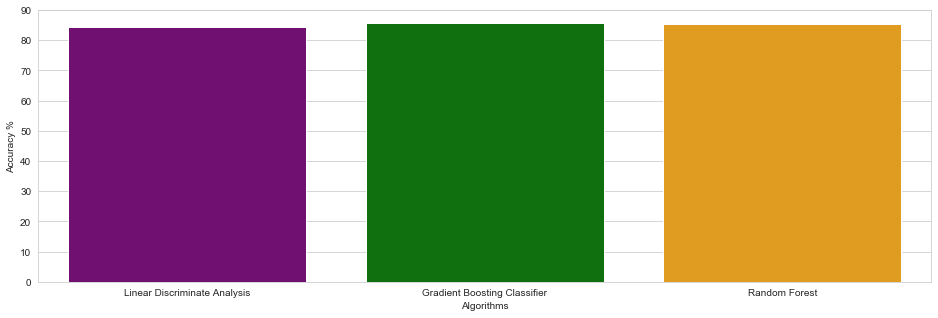

In [36]:
colors = ["purple", "green", "orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Detailed visualization of the chosen model (Gradient Boosting Classifier)

## Feature Importance

In [37]:
features_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir

In [38]:
# These are the feature labels from our data set
feature_labels = np.array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW'])




In [39]:
#Create a numpy array based on the model's feature imprtances
importance = gc.feature_importances_

In [40]:
#Sort the feature labels based on the feature imortance rankings from the model
feature_indexes_by_importance=importance.argsort()

In [41]:
# Print each feature label, from most importance to least important(reverse order)
for index in feature_indexes_by_importance:
   print("{} - {:.2f}%".format(feature_labels[index], (importance[index]*100.0)))

RainToday - 0.03%
WindDir9am_E - 0.11%
WindDir9am_S - 0.11%
WindDir9am_SSW - 0.12%
WindDir3pm_ENE - 0.12%
WindDir3pm_ESE - 0.13%
WindDir3pm_WSW - 0.14%
WindGustDir_SSE - 0.14%
WindDir9am_ENE - 0.14%
WindGustDir_WNW - 0.15%
WindGustDir_ENE - 0.15%
WindDir3pm_E - 0.15%
WindDir3pm_SSE - 0.15%
WindDir9am_SSE - 0.15%
WindDir9am_NNW - 0.16%
WindGustDir_SE - 0.16%
WindGustDir_E - 0.16%
WindGustDir_SW - 0.16%
WindDir9am_WSW - 0.16%
WindDir9am_ESE - 0.17%
WindGustDir_S - 0.17%
WindDir3pm_SW - 0.17%
WindDir3pm_S - 0.17%
WindGustDir_NNW - 0.17%
WindGustDir_SSW - 0.17%
WindGustDir_WSW - 0.18%
WindDir9am_NE - 0.18%
WindGustDir_NNE - 0.18%
WindDir9am_SW - 0.18%
WindGustDir_NW - 0.18%
WindDir9am_SE - 0.18%
WindGustDir_ESE - 0.18%
WindGustDir_N - 0.20%
WindDir9am_WNW - 0.21%
WindDir3pm_W - 0.21%
WindDir9am_NW - 0.22%
WindDir3pm_SE - 0.22%
WindDir3pm_NNE - 0.23%
WindDir9am_N - 0.24%
WindGustDir_NE - 0.25%
WindDir3pm_NW - 0.26%
WindDir3pm_SSW - 0.26%
WindDir3pm_WNW - 0.26%
WindDir3pm_NNW - 0.26%
WindDir

## Make Prediction

In [42]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

features_df.describe(include='all')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,0.675580,5.145828,8.042236,39.920123,13.988030,18.640341,68.858235,51.495742,1017.648460,1015.252481,16.985681,21.675977,0.221213,0.063794,0.056205,0.051374,0.063526,0.049651,0.045241,0.046142,0.056283,0.062936,0.065467,0.063245,0.060552,0.061867,0.134395,0.056726,0.062598,0.063463,0.054398,0.053153,0.150542,0.052935,0.055896,0.055136,0.060144,0.059729,0.064434,0.063055,0.052380,0.057928,0.058090,0.050593,0.048125,0.058667,0.054321,0.058948,0.060952,0.057415,0.045319,0.054384,0.059553,0.067500,0.101559,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608
std,6.388936,7.109617,1.184153,2.813565,2.769638,13.140632,8.825786,8.701679,18.932512,20.532227,6.746267,6.681810,6.472206,6.871243,0.415065,0.244386,0.230319,0.220760,0.243908,0.217223,0.207834,0.209792,0.230468,0.242848,0.247350,0.243404,0.238507,0.240914,0.341077,0.231319,0.242239,0.243795,0.226802,0.224339,0.357603,0.223905,0.229721,0.228247,0.237754,0.236984,0.245525,0.243063,0.222792,0.233609,0.233914,0.219166,0.214031,0.235001,0.226650,0.235528,0.239244,0.232635,0.208003,0.226774,0.236657,0.250886,0.302069,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [55]:
rain_tomorrow_value = [
    #Temperature set for the day
    12, #MinTemp - Minimum temperature in degrees celsius
    23, #MaxTemp - Maximum temperature in degrees celsius
    
    #Weather for the day
    2.3, #Rainfall - Amount of rainfall recorded for the day in mm
    5.5, #Evaporation - Class A pan evaporation in mm
    7.6, #Sunshine - Number of hours of bright sunshine in the day
    
    #Wind condition for the day
    40.7, #WindGustSpeed - The speed of the strongest wind gust in km/h
    15.2, #WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
    19.5, #WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    
    #Humidity condition for the day
    67.4, #Humidity9am - Humidity (percent)
    50.6, #Humidity3pm - Humidity (percent)
    
    #Pressure condition for the day
    1017.4, #Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
    1015.0, #Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    
    #Temperature for the day
    17.4, #Temp9am - Temperature in degrees celsius
    22.1, #Temp3pm - Temperature in degrees celsius
    
    #Did it rein today?
    0, #RainToday - Did it rain today? Boolean: 1 if it exceeds 1mm, otherwise 0
    
    #Wind Gust Direction Condition
    0, #WindGustDir_E
    0, #WindGustDir_ENE
    0, #WindGustDir_ESE
    0, #WindGustDir_N
    0, #WindGustDir_NE
    0, #WindGustDir_NNE
    0, #WindGustDir_NNW
    0, #WindGustDir_NW
    1, #WindGustDir_S
    0, #WindGustDir_SE
    0, #WindGustDir_SSE
    0, #WindGustDir_SSW
    0, #WindGustDir_SW
    0, #WindGustDir_W
    0, #WindGustDir_WNW
    0, #WindGustDir_WSW
    
    #Wind Direction at 9am
    0, #WindDir9am_E
    0, #WindDir9am_ENE	
    0, #WindDir9am_ESE	
    0, #WindDir9am_N	
    0, #WindDir9am_NE	
    0, #WindDir9am_NNE	
    0, #WindDir9am_NNW	
    0, #WindDir9am_NW	
    1, #WindDir9am_S	
    0, #WindDir9am_SE	
    0, #WindDir9am_SSE	
    0, #WindDir9am_SSW	
    0, #WindDir9am_SW	
    0, #WindDir9am_W	
    0, #WindDir9am_WNW	
    0, #WindDir9am_WSW
    
    #Wind Direction at 3pm
    0, #WindDir3pm_E	
    0, #WindDir3pm_ENE	
    0, #WindDir3pm_ESE	
    1, #WindDir3pm_N	
    0, #WindDir3pm_NE	
    0, #WindDir3pm_NNE	
    0, #WindDir3pm_NNW	
    0, #WindDir3pm_NW	
    0, #WindDir3pm_S	
    0, #WindDir3pm_SE	
    0, #WindDir3pm_SSE	
    0, #WindDir3pm_SSW	
    0, #WindDir3pm_SW	
    0, #WindDir3pm_W	
    0, #WindDir3pm_WNW	
    0, #WindDir3pm_WSW
]

rain_tomorrow_value2 = [
        #Temperature set for the day
    19, #MinTemp - Minimum temperature in degrees celsius
    33, #MaxTemp - Maximum temperature in degrees celsius
    
    #Weather for the day
    20.9, #Rainfall - Amount of rainfall recorded for the day in mm
    5.5, #Evaporation - Class A pan evaporation in mm
    14, #Sunshine - Number of hours of bright sunshine in the day
    
    #Wind condition for the day
    30, #WindGustSpeed - The speed of the strongest wind gust in km/h
    15.2, #WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
    19.5, #WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    
    #Humidity condition for the day
    67.4, #Humidity9am - Humidity (percent)
    50.6, #Humidity3pm - Humidity (percent)
    
    #Pressure condition for the day
    1017.4, #Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
    1015.0, #Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    
    #Temperature for the day
    19.8, #Temp9am - Temperature in degrees celsius
    26, #Temp3pm - Temperature in degrees celsius
    
    #Did it rein today?
    0, #RainToday - Did it rain today? Boolean: 1 if it exceeds 1mm, otherwise 0
    
    #Wind Gust Direction Condition
    0, #WindGustDir_E
    1, #WindGustDir_ENE
    0, #WindGustDir_ESE
    0, #WindGustDir_N
    0, #WindGustDir_NE
    0, #WindGustDir_NNE
    0, #WindGustDir_NNW
    0, #WindGustDir_NW
    0, #WindGustDir_S
    0, #WindGustDir_SE
    0, #WindGustDir_SSE
    0, #WindGustDir_SSW
    0, #WindGustDir_SW
    0, #WindGustDir_W
    0, #WindGustDir_WNW
    0, #WindGustDir_WSW
    
    #Wind Direction at 9am
    1, #WindDir9am_E
    0, #WindDir9am_ENE	
    0, #WindDir9am_ESE	
    0, #WindDir9am_N	
    0, #WindDir9am_NE	
    0, #WindDir9am_NNE	
    0, #WindDir9am_NNW	
    0, #WindDir9am_NW	
    0, #WindDir9am_S	
    0, #WindDir9am_SE	
    0, #WindDir9am_SSE	
    0, #WindDir9am_SSW	
    0, #WindDir9am_SW	
    0, #WindDir9am_W	
    0, #WindDir9am_WNW	
    0, #WindDir9am_WSW
    
    #Wind Direction at 3pm
    0, #WindDir3pm_E	
    0, #WindDir3pm_ENE	
    0, #WindDir3pm_ESE	
    1, #WindDir3pm_N	
    0, #WindDir3pm_NE	
    0, #WindDir3pm_NNE	
    0, #WindDir3pm_NNW	
    0, #WindDir3pm_NW	
    0, #WindDir3pm_S	
    0, #WindDir3pm_SE	
    0, #WindDir3pm_SSE	
    0, #WindDir3pm_SSW	
    0, #WindDir3pm_SW	
    0, #WindDir3pm_W	
    0, #WindDir3pm_WNW	
    0, #WindDir3pm_WSW
]
rain_tomorrow_value3 = [
        #Temperature set for the day
    1, #MinTemp - Minimum temperature in degrees celsius
    11, #MaxTemp - Maximum temperature in degrees celsius
    
    #Weather for the day
    100, #Rainfall - Amount of rainfall recorded for the day in mm
    5.5, #Evaporation - Class A pan evaporation in mm
    6, #Sunshine - Number of hours of bright sunshine in the day
    
    #Wind condition for the day
    45, #WindGustSpeed - The speed of the strongest wind gust in km/h
    15.2, #WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
    19.5, #WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    
    #Humidity condition for the day
    76, #Humidity9am - Humidity (percent)
    80, #Humidity3pm - Humidity (percent)
    
    #Pressure condition for the day
    1017.4, #Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
    1015.0, #Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    
    #Temperature for the day
    3, #Temp9am - Temperature in degrees celsius
    8, #Temp3pm - Temperature in degrees celsius
    
    #Did it rein today?
    1, #RainToday - Did it rain today? Boolean: 1 if it exceeds 1mm, otherwise 0
    
    #Wind Gust Direction Condition
    0, #WindGustDir_E
    0, #WindGustDir_ENE
    0, #WindGustDir_ESE
    0, #WindGustDir_N
    0, #WindGustDir_NE
    0, #WindGustDir_NNE
    0, #WindGustDir_NNW
    0, #WindGustDir_NW
    0, #WindGustDir_S
    0, #WindGustDir_SE
    0, #WindGustDir_SSE
    0, #WindGustDir_SSW
    1, #WindGustDir_SW
    0, #WindGustDir_W
    0, #WindGustDir_WNW
    0, #WindGustDir_WSW
    
    #Wind Direction at 9am
    0, #WindDir9am_E
    0, #WindDir9am_ENE	
    0, #WindDir9am_ESE	
    0, #WindDir9am_N	
    0, #WindDir9am_NE	
    0, #WindDir9am_NNE	
    0, #WindDir9am_NNW	
    0, #WindDir9am_NW	
    0, #WindDir9am_S	
    0, #WindDir9am_SE	
    0, #WindDir9am_SSE	
    0, #WindDir9am_SSW	
    1, #WindDir9am_SW	
    0, #WindDir9am_W	
    0, #WindDir9am_WNW	
    0, #WindDir9am_WSW
    
    #Wind Direction at 3pm
    0, #WindDir3pm_E	
    0, #WindDir3pm_ENE	
    0, #WindDir3pm_ESE	
    0, #WindDir3pm_N	
    0, #WindDir3pm_NE	
    0, #WindDir3pm_NNE	
    0, #WindDir3pm_NNW	
    0, #WindDir3pm_NW	
    0, #WindDir3pm_S	
    0, #WindDir3pm_SE	
    0, #WindDir3pm_SSE	
    0, #WindDir3pm_SSW	
    1, #WindDir3pm_SW	
    0, #WindDir3pm_W	
    0, #WindDir3pm_WNW	
    0, #WindDir3pm_WSW
]


Predicting the environment and weather based from this website: https://www.aussiespecialist.com/en/sales-resources/fact-sheets-overview/weather.html#:~:text=The%20average%20maximum%20temperature%20is,61%C2%B0F%20in%20winter

## rain_tomorrow_value
- Let's predict the data based on the mean values of each features

## rain_tomorrow_value2
- Let's predict the data based on the average day in Perth, Australia during summer

## rain_tomorrow_value3
- Let's predict the data based on the average day in Perth, Australia during winter

In [56]:
#load the trained model created with train_model.py
gc_predict = joblib.load('models//rain_prediction_model_old.pkl')

In [57]:
# scikit-learn assumes you want to predict the values for lots of houses at once, so it expects an array.
# We just want to look at a single house, so it will be the only item in our array.
rain_to_value = [rain_tomorrow_value, rain_tomorrow_value2, rain_tomorrow_value3]


In [58]:
# Run the model and make a prediction for each house in the homes_to_value array
predicted_rain_values = gc_predict.predict(rain_to_value)

In [59]:
# Since we are only predicting the price of one house, just look at the first prediction returned
predicted_value = predicted_rain_values[0]
predicted_value2 = predicted_rain_values[1]
predicted_value3 = predicted_rain_values[2]

In [60]:
print("Will it rain tomorrow? (Yes = 1, No = 0) : {:,.0f}".format(predicted_value))
print("Will it rain tomorrow? (Yes = 1, No = 0) : {:,.0f}".format(predicted_value2))
print("Will it rain tomorrow? (Yes = 1, No = 0) : {:,.0f}".format(predicted_value3))

Will it rain tomorrow? (Yes = 1, No = 0) : 0
Will it rain tomorrow? (Yes = 1, No = 0) : 0
Will it rain tomorrow? (Yes = 1, No = 0) : 1
